## **Tiền xử lý và khám phá dữ liệu 1999-2022**

## **1. Tiền xử lý dữ liệu**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.distance import mahalanobis
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
raw_data_1999_2022 = pd.read_csv("./DATA/infant_mortality_data_1999_2022.csv")
raw_data_1999_2022.head()

,Cause of death,Age of mother,Mother's education,Birth weight,Age of infant at death,Deaths,Births,Death rate per 1000,Year
0,Certain infectious and parasitic diseases (A00...,15-19 years,9 - 11 years,500 - 999 grams,28 - 364 days,14.0,1927.0,7.39 (Unreliable),1999
1,Certain infectious and parasitic diseases (A00...,15-19 years,9 - 11 years,2500 - 2999 grams,28 - 364 days,11.0,55119.0,0.20 (Unreliable),1999
2,Certain infectious and parasitic diseases (A00...,15-19 years,9 - 11 years,3000 - 3499 grams,28 - 364 days,10.0,99462.0,0.10 (Unreliable),1999
3,Certain infectious and parasitic diseases (A00...,20-24 years,9 - 11 years,500 - 999 grams,28 - 364 days,15.0,1179.0,12.90 (Unreliable),1999
4,Certain infectious and parasitic diseases (A00...,20-24 years,12 years,500 - 999 grams,28 - 364 days,17.0,2490.0,6.93 (Unreliable),1999


In [3]:
raw_data_1999_2022.shape

(22710, 9)

- Dữ liệu có 22710 mẫu và có 9 cột thuộc tính

### **Ý nghĩa của từng cột trong dữ liệu ?**
| **Cột**                | **Mô tả**                                                                 | **Ý nghĩa**                                                                                                  |
|------------------------|---------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------|
| **Cause of death**      | Nguyên nhân dẫn đến tử vong của trẻ sơ sinh.                               | Xác định lý do tử vong giúp phân tích các yếu tố nguy cơ và đưa ra biện pháp can thiệp phù hợp.             |
| **Age of mother**       | Khoảng tuổi của người mẹ khi sinh.                                        | Tuổi của người mẹ có thể ảnh hưởng đến sức khỏe của trẻ sơ sinh và khả năng sinh sản.                        |
| **Mother's education**  | Trình độ học vấn của người mẹ.                                            | Trình độ học vấn của mẹ thường liên quan đến khả năng chăm sóc trẻ và kiến thức về sức khỏe sinh sản.       |
| **Birth weight**        | Trọng lượng của trẻ khi sinh, được chia thành các nhóm.                  | Là chỉ số quan trọng để đánh giá sức khỏe ban đầu của trẻ, trọng lượng thấp hoặc cao bất thường có thể là dấu hiệu của các vấn đề sức khỏe. |
| **Age of infant at death** | Tuổi của trẻ sơ sinh tại thời điểm tử vong, được tính theo ngày, tuần, hoặc tháng. | Phân tích độ tuổi tử vong giúp nhận biết thời điểm dễ xảy ra rủi ro để có biện pháp bảo vệ phù hợp.          |
| **Deaths**              | Số lượng trẻ tử vong.                                                    | Chỉ số cơ bản để đánh giá mức độ nghiêm trọng của vấn đề tử vong trong các nhóm dân cư cụ thể.               |
| **Births**              | Số lượng trẻ được sinh ra.                                               | Dùng làm cơ sở tính toán tỷ lệ tử vong và phân tích xu hướng sinh sản theo thời gian.                       |
| **Death rate per 1000** | Tỷ lệ tử vong trên 1.000 ca sinh.                                         | Là chỉ số phản ánh mức độ tử vong trong các nhóm dân số, giúp so sánh và đánh giá các yếu tố rủi ro khác nhau. |
| **Year**                | Năm thu thập dữ liệu.                                                   | Cho phép phân tích xu hướng tử vong và sinh sản qua các năm, từ đó đánh giá hiệu quả của các chính sách và can thiệp y tế. |


### **Làm sạch dữ liệu**

Xử lý dữ liệu bị trùng lặp

In [4]:
num_duplicated_rows = raw_data_1999_2022.index.duplicated(keep='first').sum()

In [5]:
if num_duplicated_rows == 0: 
    print("Dữ liệu không có trùng lặp")
else : 
    print(f"Dữ liệu có  trùng lặp: {num_duplicated_rows} ")

Dữ liệu không có trùng lặp


**Xử lý mất giá trị**

In [6]:
def missing_ratio(series):
    return series.isnull().mean() * 100

In [7]:
miss_value_ratio = missing_ratio(raw_data_1999_2022)
miss_value_ratio

Cause of death            0.0
Age of mother             0.0
Mother's education        0.0
Birth weight              0.0
Age of infant at death    0.0
Deaths                    0.0
Births                    0.0
Death rate per 1000       0.0
Year                      0.0
dtype: float64

- Không có giá trị mất

In [8]:
dtypes = raw_data_1999_2022.dtypes
dtypes

Cause of death             object
Age of mother              object
Mother's education         object
Birth weight               object
Age of infant at death     object
Deaths                    float64
Births                    float64
Death rate per 1000        object
Year                        int64
dtype: object

### **Kiểu dữ liệu hiện tại của mỗi cột là gì? Có cột nào có kiểu dữ liệu không phù hợp không?**
- **Kiểu dữ liệu hiện tại của mỗi cột**
    + Cause of death: object
    + Age of mother: object
    + Mother's education : object
    + Birth weight: object
    + Age of infant at death: object
    + Deaths: float64
    + Births: float64
    + Death rate per 1000: object
    + Year: int64
- Các cột dữ liệu có kiểu dữ liệu không phù hợp: 
    + Kiểu dữ liệu Death rate per 1000 cần chỉnh về kiểu float.
    + Kiểu dữ liệu Year cần chỉnh về kiểu categorical.
    + Kiểu dữ liệu Birth weight cần chỉnh lại thành float bằng cách tính trung bình

#### **Thay đổi kiểu dữ liệu, giá trị phù hợp**

- Một số cột dữ liệu kiểu object như: Cause of death, Age of mother,.. cần chỉnh lại giá trị phù hợp như bỏ đi đơn vị year, grams.
    + Cần đồng bộ lại để cùng 1 đơn vị tính. Ví dụ như: 
        + Age of mother: dưới 15 cần chuyển lại cùng dạng với các giá trị khoản khác như 10-15 tuổi.
        + Mother's education thu thập không cùng 1 đơn vị đo.
        + Age of infant at death khác đơn vị thời gian như giờ, ngày,...
- Cause of death cần thể hiện một cách ngắn gọn

In [9]:
raw_data_1999_2022['Year'] = raw_data_1999_2022['Year'].astype('category')

raw_data_1999_2022['Births'] = raw_data_1999_2022['Births'].astype(int)
raw_data_1999_2022['Deaths'] = raw_data_1999_2022['Deaths'].astype(int)

# Loại bỏ phần "(Unreliable)" trong cột "Death rate per 1000"
raw_data_1999_2022["Death rate per 1000"] = raw_data_1999_2022["Death rate per 1000"].str.extract(r"(\d+\.\d+)").astype(float)

In [10]:
raw_data_1999_2022.dtypes

Cause of death              object
Age of mother               object
Mother's education          object
Birth weight                object
Age of infant at death      object
Deaths                       int64
Births                       int64
Death rate per 1000        float64
Year                      category
dtype: object

Đổi cột nguyên nhân tử vọng lại để ngắn gọn hơn

In [11]:
Cause_of_death_short = pd.read_csv("./DATA/Cause of death.csv")
Cause_of_death_short

,Cause of death,Short Name
0,Certain infectious and parasitic diseases (A00...,Certain infectious and parasitic diseases
1,#Septicemia (A40-A41),Septicemia
2,Diseases of the nervous system (G00-G98),Diseases of the nervous system
3,"Other diseases of nervous system (G04,G06-G11,...",Other diseases of nervous system
4,#Diseases of the circulatory system (I00-I99),Diseases of the circulatory system
...,...,...
56,Other external causes (Y10-Y36),Other external causes
57,"Viral diseases (A80-B34,U07.1)",Viral diseases
58,"Other and unspecified viral diseases (A81-B00,...",Other and unspecified viral diseases
59,Newborn affected by other maternal complicatio...,Newborn affected by other maternal complicatio...


In [12]:
# Tạo dictionary ánh xạ
cause_mapping = dict(zip(Cause_of_death_short['Cause of death'], Cause_of_death_short['Short Name']))

# Ánh xạ giá trị phần trăm vào cột "Cause of death"
raw_data_1999_2022['Cause of death'] = raw_data_1999_2022['Cause of death'].map(cause_mapping)
raw_data_1999_2022.to_csv("test.csv")

In [13]:
Age_of_mother = raw_data_1999_2022['Age of mother'].unique()
Age_of_mother

array(['15-19 years', '20-24 years', '25-29 years', '30-34 years',
       'Under 15 years', '35-39 years', '40-44 years'], dtype=object)

In [14]:
# Loại bỏ các đơn vị như "years"
raw_data_1999_2022["Age of mother"] = raw_data_1999_2022["Age of mother"].str.replace(" years", "", regex=False)

# đổi tuổi của mẹ từ dưới 15 tuổi thành từ 9-15
raw_data_1999_2022['Age of mother'] = raw_data_1999_2022['Age of mother'].replace("Under 15","9-15")
print(raw_data_1999_2022['Age of mother'].unique())

['15-19' '20-24' '25-29' '30-34' '9-15' '35-39' '40-44']


In [15]:
Birth_weight  = raw_data_1999_2022['Birth weight'].unique()
Birth_weight

array(['500 - 999 grams', '2500 - 2999 grams', '3000 - 3499 grams',
       '2000 - 2499 grams', '3500 - 3999 grams', '499 grams or less',
       '1000 - 1499 grams', '1500 - 1999 grams', 'Unknown or Not Stated',
       '4000 - 4499 grams'], dtype=object)

- Lỗi : "Unknown or Not Stated" , thực hiện xoá lỗi

In [16]:
raw_data_1999_2022 = raw_data_1999_2022[raw_data_1999_2022['Birth weight'] != 'Unknown or Not Stated']

# Loại bỏ các đơn vị như"grams"
raw_data_1999_2022["Birth weight"] = raw_data_1999_2022["Birth weight"].str.replace(" grams", "", regex=False)

# theo phân tích thì cân nặng khi sinh ít nhất là 200grams
raw_data_1999_2022['Birth weight'] = raw_data_1999_2022['Birth weight'].replace("499 or less","200 - 499")
print(raw_data_1999_2022['Birth weight'].unique())

['500 - 999' '2500 - 2999' '3000 - 3499' '2000 - 2499' '3500 - 3999'
 '200 - 499' '1000 - 1499' '1500 - 1999' '4000 - 4499']


In [17]:
Mother_education  = raw_data_1999_2022['Mother\'s education'].unique()
Mother_education

array(['9 - 11 years', '12 years', '13 - 15 years', '16 years and over',
       '0 -  8 years', 'Not stated/Not on certificate',
       'High school graduate or GED completed',
       '9th through 12th grade with no diploma',
       'Some college credit, but not a degree', '8th grade or less',
       'Associate degree (AA, AS)', "Bachelor's degree (BA, AB, BS)",
       "Master's degree (MA, MS, MEng, MEd, MSW, MBA)",
       'Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD)'],
      dtype=object)

**Đưa về cùng 1 mức xếp trình độ học vấn của người mẹ**

In [18]:
for index, row in raw_data_1999_2022.iterrows():
    
    education = row["Mother's education"]
    
    # kiểm tra giá trị và đưa về cùng dạng
    if education == "0 -  8 years" or education == "8th grade or less":
        raw_data_1999_2022.loc[index, "Mother's education"] = "Elementary School or Less"
        
    if education == "9 - 11 years" or education == "9th through 12th grade with no diploma":
        raw_data_1999_2022.loc[index, "Mother's education"] = "High School Incomplete"
        
    if education == "12 years" or education == "High school graduate or GED completed":
        raw_data_1999_2022.loc[index, "Mother's education"] = "High School Graduate"
        
    if education == "13 - 15 years" or education == "Some college credit, but not a degree" or education == "Associate degree (AA, AS)" :
        raw_data_1999_2022.loc[index, "Mother's education"] = "Some College Education"
    
    if education == "16 years and over" or education == "Bachelor's degree (BA, AB, BS)" or education == "Master's degree (MA, MS, MEng, MEd, MSW, MBA)"or education == "Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD)":
        raw_data_1999_2022.loc[index, "Mother's education"] = "College Graduate or Higher"
    if education == "Not stated/Not on certificate":
        raw_data_1999_2022.loc[index, "Mother's education"] = "Not Stated"

raw_data_1999_2022['Mother\'s education'].unique()

array(['High School Incomplete', 'High School Graduate',
       'Some College Education', 'College Graduate or Higher',
       'Elementary School or Less', 'Not Stated'], dtype=object)

In [19]:
Age_infant_at_death = raw_data_1999_2022['Age of infant at death'].unique()
Age_infant_at_death

array(['28 - 364 days', '1 - 23 hours', '1 - 6 days', 'Under 1 hour',
       '7 - 27 days'], dtype=object)

**Chuẩn hoá lại thời gian tử vong của trẻ cùng 1 đơn vị thời gian là giờ**

In [20]:
raw_data_1999_2022['Age of infant at death'] = raw_data_1999_2022['Age of infant at death'].replace(
                                            "28 - 364 days","672 - 8736").replace(
                                            "1 - 23 hours","1 - 23").replace(
                                            "Under 1 hour","0 - 1").replace(
                                            "1 - 6 days","24 - 144").replace(
                                            "7 - 27 days","189 - 648")

In [21]:
raw_data_1999_2022['Age of infant at death'].unique()

array(['672 - 8736', '1 - 23', '24 - 144', '0 - 1', '189 - 648'],
      dtype=object)

In [22]:
# Làm tròn và chuyển đổi thành int
raw_data_1999_2022['Births'] = raw_data_1999_2022['Births'].round(0).astype(int)
raw_data_1999_2022['Deaths'] = raw_data_1999_2022['Deaths'].round(0).astype(int)

**Chuấn hoá lại giá trị các cột kiểu dữ liệu số cho phù hợp**

In [23]:
def checking_data(df: pd.DataFrame) -> bool:
    # Kiểm tra các điều kiện cho từng cột
    check_deaths = (df['Deaths'] >= 0).all()
    check_births = (df['Births'] >= 0).all()
    check_death_rate = (df['Death rate per 1000'] >= 0).all() and (df['Death rate per 1000'] <= 1000).all()
    
    # Kết hợp các điều kiện
    check = check_deaths and check_births and check_death_rate
    
    return check

In [24]:
checking_data(raw_data_1999_2022) == True

True

### **Với mỗi cột, các giá trị được phân bổ như thế nào?**

**Sự phân bố giá trị của các cột thuộc kiểu dữ liệu numerical**

In [25]:
raw_data_1999_2022.describe()

,Deaths,Births,Death rate per 1000
count,22666.000000,22666.000000,22666.00000
mean,26.172902,15317.679829,70.28286
std,25.468533,30461.781991,104.89139
min,10.000000,19.000000,0.06000
25%,12.000000,287.500000,1.31000
50%,17.000000,1022.000000,20.21000
75%,29.000000,12929.000000,94.01750
max,334.000000,176251.000000,790.77000


Sự phân bố giá trị của các cột không thuộc kiểu dữ liệu numerical

In [26]:
non_numerical_columns = raw_data_1999_2022.select_dtypes(exclude=["int", "float"]).columns
# print(non_numerical_columns)

results = {}


for col in non_numerical_columns:
    
    miss_value = round(missing_ratio(raw_data_1999_2022[col]),1)
    
    #loại bỏ giá trị thiếu
    col_data = raw_data_1999_2022[col].dropna()
   
    col_data = col_data.explode() if col_data.apply(lambda x: isinstance(x, list)).any() else col_data
    
    
    num_values = col_data.nunique()
    
     # Tính Tỉ lệ phần trăm của mỗi giá trị (không tính giá trị thiếu)
    value_counts = col_data.value_counts(normalize=True) * 100
    
    # print(value_counts)
    value_ratios = value_counts.round(1).to_dict()  # Chuyển thành dictionary
    
    # Lưu kết quả
    results[col] = {
        "missing_ratio": miss_value,
        "num_values": num_values,
        "value_ratios": value_ratios,
    }

# Chuyển kết quả thành DataFrame
cat_col_info_df = pd.DataFrame(results)
cat_col_info_df

,Cause of death,Age of mother,Mother's education,Birth weight,Age of infant at death,Year
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0
num_values,60,7,6,9,5,24
value_ratios,{'Certain conditions originating in the perina...,"{'20-24': 28.5, '25-29': 27.2, '30-34': 21.1, ...","{'High School Graduate': 36.2, 'Some College E...","{'200 - 499': 36.0, '500 - 999': 30.5, '3000 -...","{'1 - 23': 33.0, '672 - 8736': 28.7, '0 - 1': ...","{2000: 6.1, 2001: 5.9, 2002: 5.9, 1999: 5.9, 2..."


### **Tìm kiếm và xử lý các outliers trong dữ liệu**

In [27]:
## Các cột cần xoá outliers 

numerical_cols = ['Deaths', 'Births', 'Death rate per 1000']

**Trực quan bằng biểu đồ hộp (boxplot) để xác định outliers**

- Dữ liệu được thu thập bỡi trung tâm thông kê y tế Quốc Gia của Hoa Kì, do đó ta có thể loại bỏ 1 số nguyên nhân dữ liệu nhiễu như: lỗi nhập, lỗi đo lường,...Vậy đây là ngoại lệ tự nhiên. 

In [28]:
raw_data_1999_2022[numerical_cols].describe()

,Deaths,Births,Death rate per 1000
count,22666.000000,22666.000000,22666.00000
mean,26.172902,15317.679829,70.28286
std,25.468533,30461.781991,104.89139
min,10.000000,19.000000,0.06000
25%,12.000000,287.500000,1.31000
50%,17.000000,1022.000000,20.21000
75%,29.000000,12929.000000,94.01750
max,334.000000,176251.000000,790.77000


**Tìm số lượng nhiễu và giá trị nhiễu**

In [29]:
def Zscore_outlier(df, columns):
    for col in columns:
        out = []  # Làm rỗng danh sách cho từng cột
        m = np.mean(df[col])  # Tính giá trị trung bình
        sd = np.std(df[col])  # Tính độ lệch chuẩn
        for i in df[col]:
            z = (i - m) / sd  # Tính z-score
            if np.abs(z) > 3:  # Kiểm tra ngưỡng z > 3
                out.append(i)
        unique_outliers = np.unique(out)  # Lọc các giá trị nhiễu duy nhất
        print(f"- Cột '{col}': Số lượng nhiễu = {len(unique_outliers)}")
        print(f"- Giá trị nhiễu: {unique_outliers}")

In [30]:
Zscore_outlier(raw_data_1999_2022,numerical_cols)

- Cột 'Deaths': Số lượng nhiễu = 125
- Giá trị nhiễu: [103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 173 175 176 178
 179 180 181 182 183 184 185 187 188 189 190 191 192 193 194 195 197 198
 201 203 204 206 207 210 211 212 216 218 220 221 229 230 233 234 235 236
 240 242 245 246 250 251 253 260 268 271 275 282 290 310 320 321 334]
- Cột 'Births': Số lượng nhiễu = 64
- Giá trị nhiễu: [107119 107248 107950 108523 109352 109901 110070 110624 110957 111302
 111598 112514 112792 113325 113466 113532 114586 114683 115355 115520
 115775 115835 115881 117885 118806 119264 119845 120190 120317 120460
 120911 121155 121431 122123 122536 122548 122797 123072 123945 124566
 125996 128378 129510 130495 130947 131047 131589 131807 133882 134811
 135060 136244 139958 140591 1

**Phân tích liệu rằng đây là nhiễu đơn biến hay đa biến**


##### **Phân tích ảnh hưởng của nhiễu**


**Sử dụng phương pháp Z score để xoá outliers**

In [31]:
def remove_zscore_outliers(df, columns):
    for col in columns:
        m = np.mean(df[col])
        sd = np.std(df[col])
        # Chỉ giữ lại những giá trị có Z-score < 3
        df = df[(df[col] - m).abs() / sd <= 3]
    return df

# Loại bỏ các ngoại lệ từ dữ liệu
data_cleaned = remove_zscore_outliers(raw_data_1999_2022, numerical_cols)

**Phân tích sự thay đổi sự tương quan giữa các biến thay đổi như nào** 

In [32]:
# Trước khi loại bỏ nhiễu
correlation_before = raw_data_1999_2022[['Deaths', 'Births', 'Death rate per 1000']].corr()

# Sau khi loại bỏ nhiễu (ví dụ theo Z-score)
correlation_after = data_cleaned[['Deaths', 'Births', 'Death rate per 1000']].corr()


In [33]:
correlation_before

,Deaths,Births,Death rate per 1000
Deaths,1.000000,-0.018878,0.437692
Births,-0.018878,1.000000,-0.328723
Death rate per 1000,0.437692,-0.328723,1.000000


In [34]:
correlation_after

,Deaths,Births,Death rate per 1000
Deaths,1.000000,-0.018897,0.372645
Births,-0.018897,1.000000,-0.369750
Death rate per 1000,0.372645,-0.369750,1.000000


**Phân tích việc xoá outliers có làm cho mô hình dự đoán được cải thiện hay không ?**

- Thực hiện đối với 2 thuộc tính "Deaths" và "Death rate per 1000" :
    + Dữ liệu được chia thành tập huấn luyện (train) và tập kiểm tra (test) với tỷ lệ 80:20.
    + Một mô hình hồi quy tuyến tính (LinearRegression) được huấn luyện trên tập huấn luyện.
    + Lỗi MSE (Mean Squared Error) được tính toán trên "giá trị dự đoán" và "giá trị kiểm tra" để đo lường độ chính xác của mô hình trước khi xoá outliers.

In [35]:
# Dữ liệu ban đầu
X = raw_data_1999_2022[['Deaths']]
y = raw_data_1999_2022['Death rate per 1000']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
error_before = mean_squared_error(y_test, predictions)

# Dữ liệu sau khi loại bỏ nhiễu
X_clean = data_cleaned[['Deaths']]
y_clean = data_cleaned['Death rate per 1000']
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

model.fit(X_train_clean, y_train_clean)
predictions_clean = model.predict(X_test_clean)
error_after = mean_squared_error(y_test_clean, predictions_clean)

print(f"Lỗi trước khi loại bỏ nhiễu: {error_before}")
print(f"Lỗi sau khi loại bỏ nhiễu: {error_after}")

Lỗi trước khi loại bỏ nhiễu: 8756.729357396136
Lỗi sau khi loại bỏ nhiễu: 5197.374488379891


Kết quả bạn nhận được cho thấy sự cải thiện rõ rệt trong hiệu suất mô hình khi loại bỏ nhiễu (outliers) từ dữ liệu:

- Lỗi trước khi loại bỏ nhiễu: 8756.729
- Lỗi sau khi loại bỏ nhiễu: 5197.375

**Nhận xét:**
- Giảm đáng kể lỗi mô hình:
    + Lỗi mean squared error (MSE) trước khi loại bỏ nhiễu là  8756.729 và sau khi loại bỏ nhiễu là 5197.375. MSE giảm mạnh, cho thấy mô hình có thể dự đoán chính xác hơn khi không bị ảnh hưởng bởi các điểm dữ liệu ngoại lệ.
    + Điều này chứng tỏ rằng các giá trị ngoại lệ có thể gây méo mó mô hình, làm giảm khả năng dự đoán của mô hình hồi quy tuyến tính.
- Lý do loại bỏ outliers giúp mô hình cải thiện:
    + Các outliers có thể làm tăng sai số trong quá trình huấn luyện và dự đoán. Khi các điểm dữ liệu này không đại diện cho xu hướng chung của dữ liệu, mô hình có thể học được những quan hệ không thực tế hoặc cực đoan, gây ra lỗi dự đoán lớn hơn.
    + Việc loại bỏ nhiễu giúp mô hình học từ những dữ liệu "sạch" và tập trung vào các mẫu dữ liệu chính thống, làm tăng tính chính xác và giảm sai số.
- Quyết định có nên loại bỏ outliers:
    + Với kết quả trên, việc loại bỏ outliers có vẻ là một quyết định hợp lý trong trường hợp này vì nó giúp cải thiện hiệu suất mô hình rõ rệt.
    + Tuy nhiên, cần lưu ý rằng quyết định loại bỏ ngoại lệ phải dựa trên bối cảnh của bài toán. Nếu những ngoại lệ này phản ánh một hiện tượng quan trọng (ví dụ như một sự kiện đặc biệt hoặc trường hợp ngoại lệ có ý nghĩa), bạn cần cân nhắc kỹ trước khi loại bỏ. Trong trường hợp của bạn, nếu các giá trị này là sai sót trong dữ liệu hoặc không phù hợp với phân phối chung, việc loại bỏ chúng là hợp lý.
    
**Kết luận:**
Việc loại bỏ outliers trong trường hợp này giúp mô hình dự đoán chính xác hơn, với MSE giảm mạnh. Do đó, có thể kết luận rằng loại bỏ outliers là một bước cần thiết để cải thiện hiệu suất mô hình trong trường hợp này.

**Xuất file đã tiền xử lý**

In [36]:
data_cleaned['Births'] = data_cleaned['Births'].round(0).astype(int)
data_cleaned['Deaths'] = data_cleaned['Deaths'].round(0).astype(int)

In [37]:
data_cleaned.to_csv("./DATA/preprocessing_1999_2022.csv", index=False)

## **2. Khám phá dữ liệu**

In [38]:
# Hiển thị thông tin tổng quan về dữ liệu
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 20959 entries, 0 to 22708
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Cause of death          20959 non-null  object  
 1   Age of mother           20959 non-null  object  
 2   Mother's education      20959 non-null  object  
 3   Birth weight            20959 non-null  object  
 4   Age of infant at death  20959 non-null  object  
 5   Deaths                  20959 non-null  int64   
 6   Births                  20959 non-null  int64   
 7   Death rate per 1000     20959 non-null  float64 
 8   Year                    20959 non-null  category
dtypes: category(1), float64(1), int64(2), object(5)
memory usage: 1.5+ MB
None


### **2.1 Khám phá đơn thuộc tính**

Mục tiêu: khám phá sự phân bố từng giá trị của mỗi thuộc tính, giá trị nào phức tạp cần phân tích kĩ

#### **2.1.1 Dữ liệu dạng phân loại**

In [39]:
def bar_plot_cate(df, feature):
    # Tạo một hình mới với kích thước 10x6
    plt.figure(figsize=(10, 6))
    
    # Vẽ biểu đồ đếm (countplot) cho cột phân loại
    ax = sns.countplot(data=df, x=feature)
    
    # Lặp qua từng thanh (cột) trong biểu đồ
    for p in ax.patches:
        count = int(p.get_height())  # Lấy giá trị số lượng (chiều cao của cột)
        if count > 0:  # Chỉ hiển thị giá trị nếu số lượng > 0
            ax.annotate(
                f'{count}',  # Hiển thị giá trị số lượng
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Vị trí giá trị
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5), 
                textcoords='offset points'  # Dịch lên trên đỉnh cột 5 đơn vị
            )
    
    # Đặt tiêu đề và nhãn trục
    plt.title(f'Bar Chart of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=90)  # Xoay nhãn trục X nếu cần
    plt.tight_layout()  # Đảm bảo bố cục không bị cắt
    plt.show()  # Hiển thị biểu đồ


##### **Thuộc tính `Age of mother`**

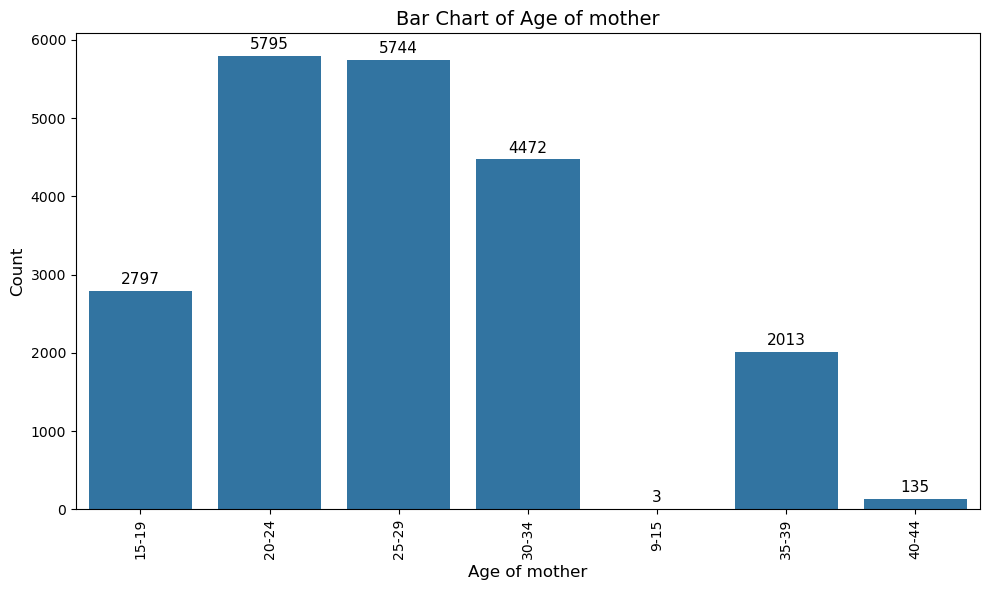

In [40]:
bar_plot_cate(data_cleaned, "Age of mother")

- **Phân tích số mẫu dữ liệu được xét theo độ tuổi của mẹ (Age of mother)**
    + Nhóm có mẫu dữ liệu nhiều nhất:
        - Các bà mẹ từ 20-24 tuổi và 25-29 tuổi mẫu dữ liệu cao nhất (5,795 và 5,744 mẫu).
        - Số lượng tử vong giảm dần với các nhóm tuổi lớn hơn, đặc biệt thấp ở nhóm 40-44 tuổi (chỉ 135 mẫu).
        - Nhóm tuổi đặc biệt: nhóm 9-15 tuổi chỉ có mẫu ca tử vong, thể hiện sự hiếm hoi trong dữ liệu.
    + Xu hướng:
        - Các bà mẹ ở độ tuổi trẻ (20-29) có nhiều mẫu dữ liệu nhất trong khi nhóm lớn tuổi và nhỏ tuổi hơn ít hơn, thể hiện độ tuổi này có nhiều vấn đề gây ra sự tử vong của trẻ.
- **Kết luận:**
    + Các nhóm tuổi 20-24 và 25-29 với số lượng mẫu dữ liệu rất cao, có thể nói rằng độ tuổi này sinh sản nhiều và các nhân tố về mẹ và trẻ rất đa dạng và nguyên nhân tử vong rất đa dạng. Để đoán được nguyên nhân chết và tỉ lệ do nguyên nhân đó là bao nhiêu trong độ tuổi rất phức tạp. 
    + Nhóm 9-15 tuổi và 40-44 tuổi mẫu dữ liệu thấp, các tình trạng và nguyên nhân gây ra tử vong của trẻ ít hơn nhiều so với độ tuổi 20-29. 

##### **Thuộc tính `Mother's education`**

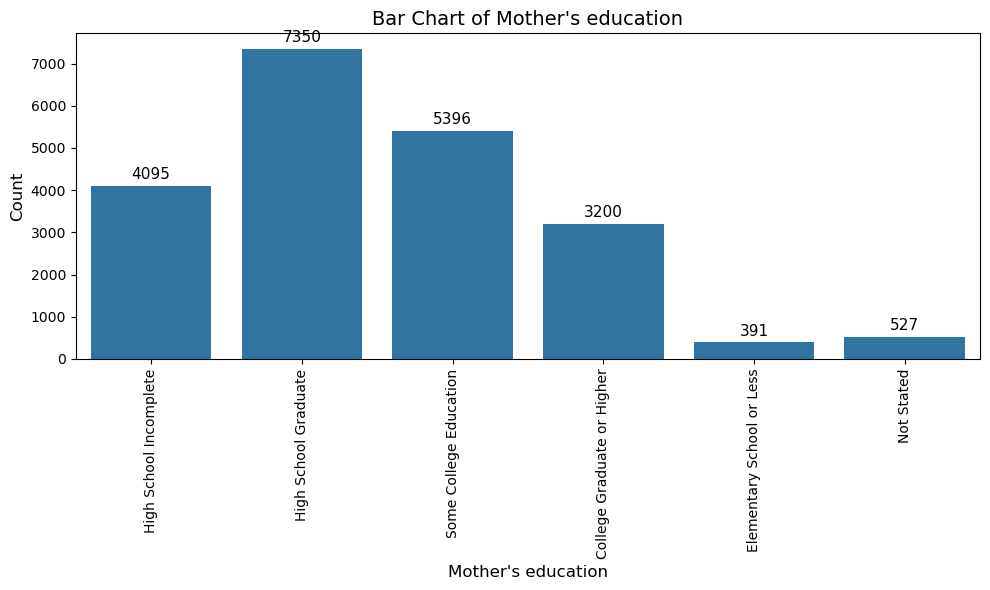

In [41]:
bar_plot_cate(data_cleaned, "Mother's education")

- **Phân tích số lượng mẫu dữ liệu theo bậc học của mẹ (Mother's education)**	
    - Nhóm trình độ giáo dục phổ biến:
        + High School Graduate (Tốt nghiệp trung học phổ thông) chiếm tỷ lệ cao nhất với 7,350 mẫu dữ liệu.
        + Some College Education (Đã học đại học nhưng chưa tốt nghiệp) đứng thứ hai với 5,396 mẫu dữ liệu.
        + High School Incomplete (Không hoàn thành trung học) cũng chiếm một số lượng đáng kể, 4,095 mẫu dữ liệu.
    - Nhóm ít phổ biến:
        + Elementary School or Less (Trình độ tiểu học hoặc thấp hơn) chỉ có 391 mẫu dữ liệu.
        + Not Stated (Không khai báo) chiếm 527 mẫu dữ liệu.
    - Xu hướng tổng quát:
        + Phần lớn các bà mẹ có trình độ giáo dục từ trung học trở lên (High School Graduate hoặc Some College Education).
        + Trình độ giáo dục thấp (Elementary School or Less) rất hiếm trong dữ liệu.
- **Kết luận**
    - Phần lớn các mẫu được lấy từ các bà mẹ có trình độ học vấn tốt (tốt nghiệp trung học hoặc đã học đại học). Điều này cho thấy các nhân tố về mẹ ( với bậc học vấn chưa cao) và trẻ đa dạng dẫn đến các nguyên nhân chết của trẻ rất phức tạp. 
    - Trình độ giáo dục thấp không phổ biến, có thể liên quan đến xu hướng xã hội hiện đại.

##### **Thuộc tính `Birth weight`**

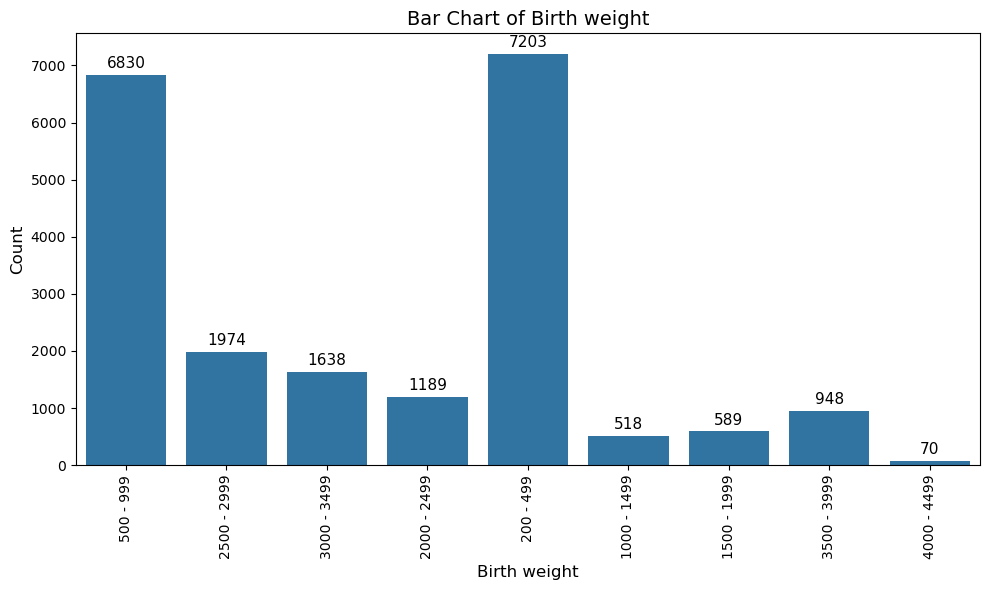

In [42]:
bar_plot_cate(data_cleaned, "Birth weight")

- **Phân tích số lượng mẫu dữ liệu theo cân nặng của trẻ lúc mới sinh ra (Birth weight)**
    - Khoảng trọng lượng phổ biến:
        + Khoảng "200 - 499" có số lượng cao nhất (8154), cho thấy đây là nhóm có mẫu dữ liệu phổ biến nhất.
        + Khoảng "500 - 999" đứng thứ hai với 6907 mẫu dữ liệu.
    - Trọng lượng trung bình:
        + Các nhóm trọng lượng trung bình như "2500 - 2999" (1991 mẫu dữ liệu) và "3000 - 3499" (2226 mẫu dữ liệu) có số lượng ít hơn so với nhóm nhẹ cân hơn.
    - Nhóm trọng lượng thấp và cao:
        + Trọng lượng cực thấp ("1000 - 1499" và "1500 - 1999") có số lượng thấp hơn, lần lượt là 518 và 589 mẫu dữ liệu.
        + Trọng lượng lớn ("4000 - 4499") rất hiếm, chỉ có 70 mẫu dữ liệu.
- **Kết luận**
    - Trọng lượng từ "200 - 999" có rất nhiều mẫu dữ liệu do tình trạng sinh non hoặc trẻ sơ sinh thiếu cân làm cho thể trạng yếu.Phản ánh tình trạng cân nặng thấp của trẻ dẫn đến xảy ra rất nhiều nguyên nhân tử vong khác nhau.
    - Các mẫu dữ liệu trọng lượng trên mức trung bình hoặc cao có thể cần được theo dõi kỹ hơn, vì có thể liên quan đến tình trạng sức khỏe của trẻ. ​

##### **Thuộc tính `Age of infant at death`**

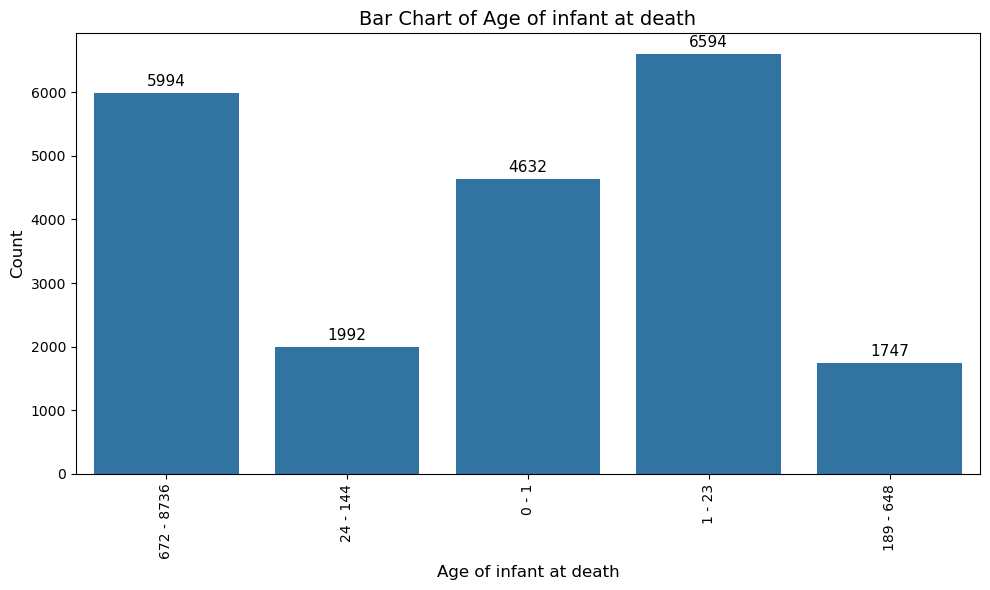

In [43]:
bar_plot_cate(data_cleaned, "Age of infant at death")

- **Phân tích số lượng mẫu dữ liệu theo độ tuổi của trẻ sơ sinh khi tử vong (Age of infant at death) theo đơn vị là giờ**
    - Độ tuổi tử vong phổ biến nhất: 
        + Nhóm tuổi "0 - 1" có số lượng mẫu dữ liệu cao  (6594 mẫu ), cho thấy đa số trẻ sơ sinh tử vong trong 1 giờ đầu tiên của chào đời. Điều này cho thấy giai đoạn sơ sinh là giai đoạn rất nhạy cảm và dễ bị tổn thương.
        + Nhóm tuổi "1 - 23" trong ngày đầu chào đời có số lượng mẫu  (1747 mẫu ), cho thấy nguy cơ tử vong tử vong của trẻ khi chào đời 1 ngày rất là cao.
        + Nhóm tuổi "672 - 8736" hay 28 ngày đến 1 năm có số lượng tử vong khá cao (5994 mẫu). Cùng với độ tuổi khác 1 - 23 và 0-1.
    - Các nhóm tuổi khác: 
        - Các nhóm tuổi khác có số lượng tử vong rất thấp, cho thấy tỉ lệ tử vong giảm đáng kể sau năm đầu tiên. Và độ tuổi từ 1 tháng đến 1 năm thì các tác nhân gây hại bên ngoài ảnh hưởng lớn như (Covic 19,...)
- **Kết luận**

    - Số lượng trẻ sơ sinh tử vong trong giờ đầu tiên của cuộc đời là rất lớn, đặc biệt là trong nhóm tuổi "0-1" và "1-23" giờ. Điều này cho thấy giai đoạn sơ sinh là giai đoạn rất nhạy cảm và dễ bị tổn thương trước các yếu tố nguy cơ.
    - Việc tử vong tập trung từ 1 tháng đến 1 năm sau sinh cho thấy các nguyên nhân tử vong có thể liên quan đến các vấn đề yếu tố ảnh hưởng từ bên ngoài không phải do bẫm sinh. 

##### **Thuộc tính `Cause of death`**

/tmp/ipykernel_670/3896173426.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Đảm bảo bố cục không bị cắt


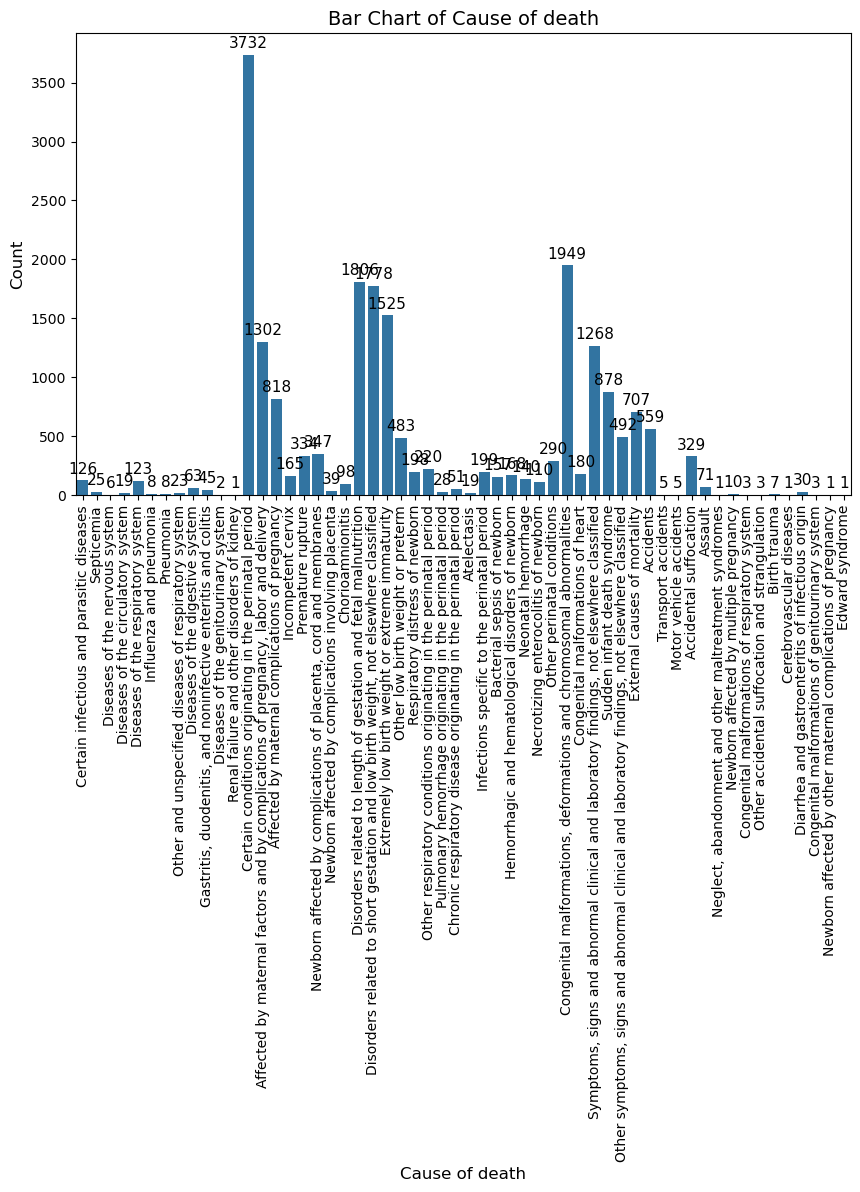

In [44]:
bar_plot_cate(data_cleaned, "Cause of death")

- **Phân tích các mẫu dữ liệu về nguyên nhân tử vong ở trẻ**
    - Nhóm nguyên nhân cao nhất:
        + Các tình trạng phát sinh trong giai đoạn chu sinh (Certain conditions originating in the perinatal period) với số lượng mẫu dữ liệu cao nhất cho thấy với nguyên nhân này có sự đa dạng về các nhân tố gây ra
        + Rối loạn liên quan đến sinh non và thiếu cân (Disorders related to short gestation and low birth weight) v nguyên nhân chiếm tỉ lệ cao thứ 2 .
        + Dị tật bẩm sinh, biến dạng và bất thường nhiễm sắc thể (Congenital malformations, deformations and chromosomal abnormalities) cao thứ 3
        + Các tình trạng khác khởi phát trong giai đoạn chu sinh (Other conditions originating in the perinatal period) và các nguyên nhân liên quan đến biến chứng thai kỳ như Trẻ sơ sinh bị ảnh hưởng bởi các yếu tố từ mẹ và biến chứng thai kỳ, chuyển dạ và sinh nở (Newborn affected by maternal factors) cũng có số lượng lớn.
    - Nguyên nhân tử vong đáng chú ý:
        + Sinh non nặng và cân nặng cực kỳ thấp (Extremely low birth weight or extreme immaturity) cũng góp phần lớn vào tổng số lượng tử vong.
        + Một số nguyên nhân khác có mức thấp hơn nhưng vẫn cần chú ý như Respiratory conditions và Infections (Hội chứng suy hô hấp ở trẻ sơ sinh)
- **Kết luận:**
    - Tần suất của top 15 các nguyên nhân chết ở trên cho thấy **sự đa dạng các nhân tố** gây ra sự tử vong ở trẻ. Các nguyên nhân này bao gồm:
        + Yếu tố liên quan đến thai kỳ và sức khỏe của mẹ: Các vấn đề như sinh non, thiếu cân và các biến chứng thai kỳ chiếm tỉ lệ lớn.
        + Dị tật bẩm sinh và các bất thường nhiễm sắc thể: Đây là một trong những nguyên nhân hàng đầu gây tử vong ở trẻ.
        + Vấn đề hô hấp và nhiễm trùng: Các bệnh như suy hô hấp và viêm phổi trong giai đoạn chu sinh đóng góp đáng kể vào số ca tử vong.


#### **2.1.2 Dữ liệu dạng số**

##### **Thuộc tính `Births`**

In [45]:
def his_plot_num(df , feature):
    # Tạo một biểu đồ mới với kích thước 10x6
    plt.figure(figsize=(10, 6))
    
    # Vẽ biểu đồ phân phối cho cột hiện tại, bao gồm đường KDE (Kernel Density Estimation)
    sns.histplot(df[feature], kde=True)
    
    # Đặt tiêu đề cho biểu đồ, tên cột sẽ được hiển thị trong tiêu đề
    plt.title(f'Distribution of {feature}')
    
    # Đặt nhãn cho trục x (theo tên cột hiện tại)
    plt.xlabel(feature)
    
    # Đặt nhãn cho trục y (tần suất - Frequency)
    plt.ylabel('tần suất')
    
    # Hiển thị biểu đồ
    plt.show()

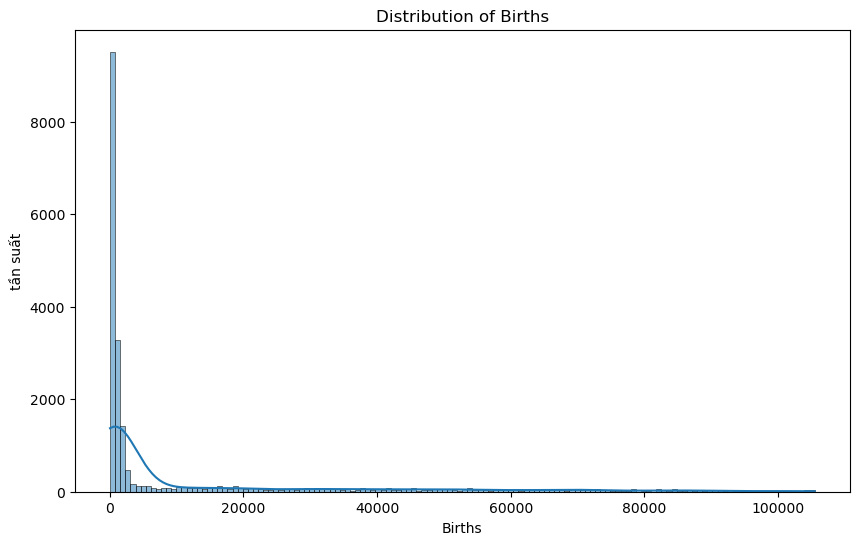

In [46]:
his_plot_num(data_cleaned,"Births")

- **Phân tích số lượng mẫu dữ liệu theo số ca sinh (Births)**
    - Với từng yếu tố dẫn đến tử vong khác nhau thì số ca sinh tập trung chủ yếu dưới 10.000.00 rất cao.  
    - Ngược lại trên 10.000 rất thấp.

##### **Thuộc tính `Deaths`**

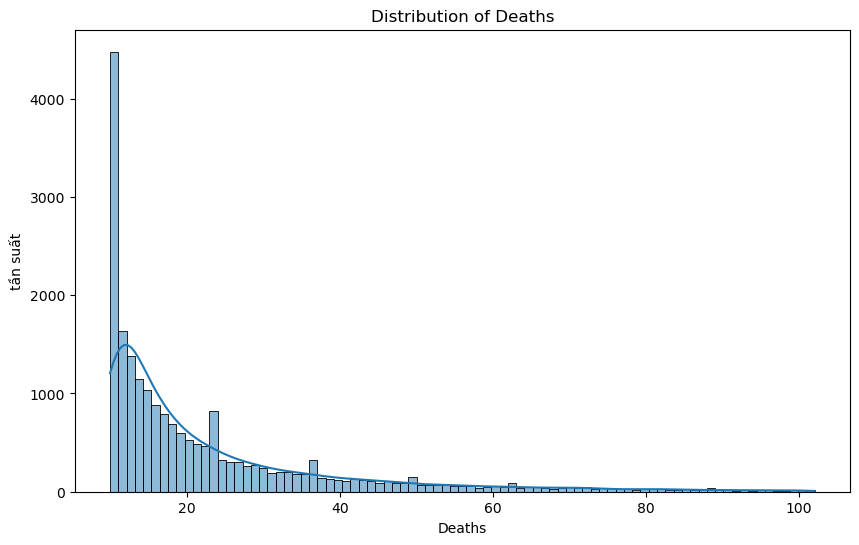

In [47]:
his_plot_num(data_cleaned,"Deaths")

- **Phân tích số lượng mẫu dữ liệu theo số lượng ca tử vong (Deaths)**
    - Với các nhân tố gây tử vong khác nhau ở trẻ thì các số lượng ca tử vong nằm khoảng từ dưới 10 đến 25 tần xuất rất lớn. 
    - Dần về số lượng ca tử vong cao thì tần suất ngày càng ít đi rỏ rệt. 
- **Kết luận**
    - Số lượng ca chết ít nhưng ngược lại tần số rất là nhiều. Điều này cho thấy sự đa dạng yếu tố dẫn đến sự tử vong của trẻ.

##### **Thuộc tính `Death rate per 1000`**

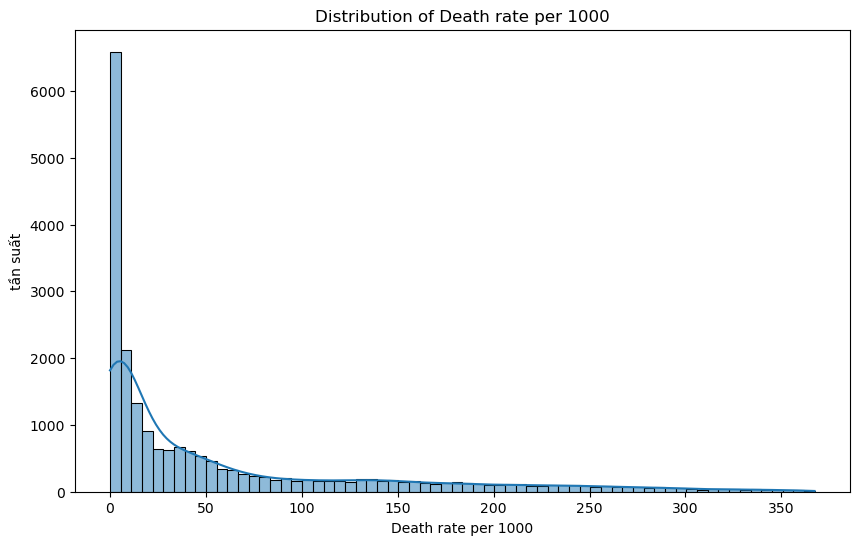

In [48]:
his_plot_num(data_cleaned,"Death rate per 1000")

- **Phân tích các mẫu dữ liệu với tỉ lệ tử vong**
    - Tỉ lệ tử vong thấp chiếm ưu thế:
        + Phần lớn các trường hợp có tỉ lệ tử vong ở mức thấp, tập trung nhiều nhất trong khoảng 0 đến 20 trên 1000.
    - Phân bố không đối xứng (lệch phải):
        + Mặc dù tỉ lệ tử vong cao có xuất hiện, nhưng tần suất rất thấp, nghĩa là các trường hợp này không phổ biến.
- **Kết luận:**
    - Tỉ lệ tử vong thấp chiếm đa số: Hầu hết các trường hợp tử vong nằm trong khoảng tỉ lệ thấp (0-20 trên 1000), cho thấy phần lớn trẻ sơ sinh có nguy cơ tử vong ở mức thấp.
    - Các trường hợp tỉ lệ tử vong cao hiếm gặp: Các trường hợp có tỉ lệ tử vong rất cao (trên 100 trên 1000) chiếm tỉ lệ rất nhỏ, nhưng cần được chú ý để tìm hiểu nguyên nhân cụ thể.

### **3. Khám phá sự tương quan của các thuộc tính**

#### **Chuẩn hoá dữ liệu thành dạng numerical**

Chuẩn hoá thuộc tính cân nặng sau khi sinh bằng cách tính trung bình

In [49]:
data_1999_2022_encode = data_cleaned

Chuẩn hoá thuộc tính nguyên nhân tử vong thành numerical

In [50]:
cause_of_death_col = data_1999_2022_encode['Cause of death']

cause_of_death_col_unique = cause_of_death_col.unique()

In [51]:
print(f"số lượng khả năng gây tử vong {len(cause_of_death_col_unique)}")
print(cause_of_death_col_unique)

số lượng khả năng gây tử vong 56
['Certain infectious and parasitic diseases' 'Septicemia'
 'Diseases of the nervous system' 'Diseases of the circulatory system'
 'Diseases of the respiratory system' 'Influenza and pneumonia'
 'Pneumonia' 'Other and unspecified diseases of respiratory system'
 'Diseases of the digestive system'
 'Gastritis, duodenitis, and noninfective enteritis and colitis'
 'Diseases of the genitourinary system'
 'Renal failure and other disorders of kidney'
 'Certain conditions originating in the perinatal period'
 'Affected by maternal factors and by complications of pregnancy, labor and delivery'
 'Affected by maternal complications of pregnancy' 'Incompetent cervix'
 'Premature rupture'
 'Newborn affected by complications of placenta, cord and membranes'
 'Newborn affected by complications involving placenta' 'Chorioamnionitis'
 'Disorders related to length of gestation and fetal malnutrition'
 'Disorders related to short gestation and low birth weight, not elsew

In [52]:
cause_count = cause_of_death_col.value_counts()

cause_percentage = ((cause_count / cause_count.sum()) * 100).round(1)

# chuyển thành DataFrame để dễ dàng quan sát. 
cause_df = cause_percentage.reset_index()
cause_df.columns = ["Cause of death", "Percentage"]

# Sắp xếp theo tỷ lệ giảm dần (nếu cần)
cause_df = cause_df.sort_values(by="Percentage", ascending=False)

In [53]:
sum_of_percentage_greater_than_1 = 0
for i in range(cause_df.shape[0]):
    if cause_df['Percentage'][i] >= 1:
        sum_of_percentage_greater_than_1 += cause_df['Percentage'][i]
        print(f"{cause_df['Cause of death'][i]}: {cause_df['Percentage'][i]}%")


print(f"\ntổng tỷ lệ lớn hơn hoặc bằng 1%: {sum_of_percentage_greater_than_1}%")
print(f"tổng tỷ lệ nhỏ hơn 1%: {100 - sum_of_percentage_greater_than_1}%")

Certain conditions originating in the perinatal period: 17.8%
Congenital malformations, deformations and chromosomal abnormalities: 9.3%
Disorders related to length of gestation and fetal malnutrition: 8.6%
Disorders related to short gestation and low birth weight, not elsewhere classified: 8.5%
Extremely low birth weight or extreme immaturity: 7.3%
Affected by maternal factors and by complications of pregnancy, labor and delivery: 6.2%
Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified: 6.0%
Sudden infant death syndrome: 4.2%
Affected by maternal complications of pregnancy: 3.9%
External causes of mortality: 3.4%
Accidents: 2.7%
Other symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified: 2.3%
Other low birth weight or preterm: 2.3%
Newborn affected by complications of placenta, cord and membranes: 1.7%
Premature rupture: 1.6%
Accidental suffocation: 1.6%
Other perinatal conditions: 1.4%
Other respiratory condition

In [54]:
# Tạo dictionary ánh xạ
cause_mapping = dict(zip(cause_df['Cause of death'], cause_df['Percentage']))

# Ánh xạ giá trị phần trăm vào cột "Cause of death"
data_1999_2022_encode['Cause of death'] = data_1999_2022_encode['Cause of death'].map(cause_mapping)


**Chuyển đổi giá trị "Birth weight" thành dạng numerical bằng cách tính trung bình trong khoảng giá trị**

In [55]:

for index, value in data_1999_2022_encode["Birth weight"].items():
    values = value.split(" - ")
    average = (int(values[0]) + int(values[1])) / 2
    data_1999_2022_encode.at[index, "Birth weight"] = average


In [56]:
data_1999_2022_encode["Birth weight"]

0         749.5
1        2749.5
2        3249.5
3         749.5
4         749.5
          ...  
22703    3249.5
22704    2749.5
22706    3749.5
22707    2749.5
22708    3249.5
Name: Birth weight, Length: 20959, dtype: object

Chuẩn hoá thuộc tính: tuổi của mẹ, trình độ học vấn, tuổi khi tử vọng của trẻ
Sử dụng phương pháp **label encoding** 

In [57]:
columns_to_encode  = ["Age of mother","Mother's education","Age of infant at death","Year"]


# dictionary to store encoding mappings
encoding_mappings = {}

# insert to new dataframe encoded columns
for col in data_1999_2022_encode.columns:
    if col in columns_to_encode:
        label_encoder = LabelEncoder()
        data_1999_2022_encode[col] = label_encoder.fit_transform(data_1999_2022_encode[col]) #encode values
        
        # store encoding values
        encoding_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
        
#Encoding Mappings
for col, mapping in encoding_mappings.items():
    print(f"{col}: {mapping}")    


Age of mother: {'15-19': 0, '20-24': 1, '25-29': 2, '30-34': 3, '35-39': 4, '40-44': 5, '9-15': 6}
Mother's education: {'College Graduate or Higher': 0, 'Elementary School or Less': 1, 'High School Graduate': 2, 'High School Incomplete': 3, 'Not Stated': 4, 'Some College Education': 5}
Age of infant at death: {'0 - 1': 0, '1 - 23': 1, '189 - 648': 2, '24 - 144': 3, '672 - 8736': 4}
Year: {1999: 0, 2000: 1, 2001: 2, 2002: 3, 2003: 4, 2004: 5, 2005: 6, 2006: 7, 2007: 8, 2008: 9, 2009: 10, 2010: 11, 2011: 12, 2012: 13, 2013: 14, 2014: 15, 2015: 16, 2016: 17, 2017: 18, 2018: 19, 2019: 20, 2020: 21, 2021: 22, 2022: 23}


**Kiểm tra lại kiểu dữ liệu**

In [58]:
data_1999_2022_encode.dtypes

Cause of death            float64
Age of mother               int64
Mother's education          int64
Birth weight               object
Age of infant at death      int64
Deaths                      int64
Births                      int64
Death rate per 1000       float64
Year                        int64
dtype: object

### **Mô tả sự tương quan giữa các thuộc tính**

In [59]:
data_1999_2022_encode.to_csv("test.csv")

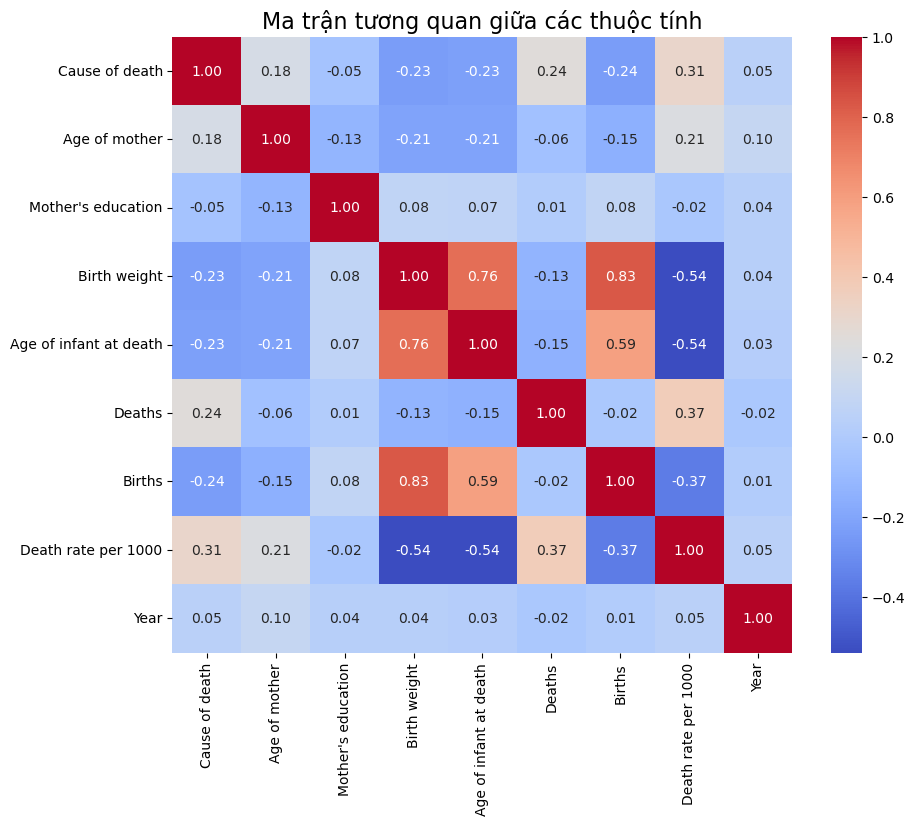

In [60]:
plt.figure(figsize=(10, 8))
correlation_matrix = data_1999_2022_encode.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Ma trận tương quan giữa các thuộc tính', fontsize=16)
plt.show()

**Phân tích tương quan giữa các biến trong dữ liệu**
- Dựa vào ma trận tương quan và biểu đồ heatmap, các điểm nổi bật như sau:

1. **Tương quan dương (đồng biến) mạnh:**
   - **`Birth weight` và `Births`**: Hệ số tương quan là **0.83**, cho thấy cân nặng khi sinh và số ca sinh có mối quan hệ mạnh. Điều này có thể phản ánh rằng các nhóm cân nặng cụ thể có thể liên quan đến số lượng trẻ sinh ra.
   - **`Birth weight` và `Age of infant at death`**: Hệ số tương quan là **0.76**, nghĩa là cân nặng khi sinh có mối liên hệ mạnh với tuổi của trẻ tại thời điểm tử vong.
   - **`Death rate per 1000` và `Deaths`**: Hệ số tương quan là **0.37**, cho thấy tỷ lệ tử vong trên 1000 ca có mối quan hệ đáng kể với số lượng ca tử vong.

2. **Tương quan âm (nghịch biến) mạnh:**
   - **`Birth weight` và `Death rate per 1000`**: Hệ số tương quan là **-0.54**, điều này cho thấy trẻ có cân nặng khi sinh cao thường có tỷ lệ tử vong thấp hơn.
   - **`Age of infant at death` và `Death rate per 1000`**: Hệ số tương quan là **-0.54**, nghĩa là trẻ sống lâu hơn (tuổi tử vong cao) thường có tỷ lệ tử vong thấp hơn.

3. **Tương quan trung bình:**
   - **`Cause of death` và `Deaths`**: Hệ số tương quan là **0.24**, có mối quan hệ trung bình giữa nguyên nhân tử vong và số lượng ca tử vong.
   - **`Age of mother` và `Death rate per 1000`**: Hệ số tương quan là **0.21**, cho thấy tuổi của mẹ có mối quan hệ nhất định với tỷ lệ tử vong.

4. **Tương quan yếu:**
   - Các biến như **`Year`** và hầu hết các biến khác có hệ số tương quan thấp (< 0.1), cho thấy năm không có mối quan hệ đáng kể với các biến số khác.

---

**Kết luận từ phân tích tương quan**
1. **Cân nặng khi sinh (Birth weight) là yếu tố quan trọng nhất trong dữ liệu:**
   - Cân nặng khi sinh có quan hệ mạnh với **số ca sinh (Births)** và **tuổi của trẻ tại thời điểm tử vong (Age of infant at death)**.
   - Trẻ có cân nặng khi sinh thấp thường có tỷ lệ tử vong cao hơn, phản ánh qua tương quan âm với **Death rate per 1000**.
   - Điều này gợi ý rằng việc cải thiện cân nặng khi sinh có thể làm giảm nguy cơ tử vong ở trẻ.

2. **Tử vong và tỷ lệ tử vong liên quan mật thiết:**
   - **Số ca tử vong (Deaths)** có mối quan hệ đáng kể với **tỷ lệ tử vong trên 1000 ca (Death rate per 1000)**, cho thấy quy mô tử vong thực tế và tỷ lệ tử vong tương đối có liên hệ chặt chẽ.

3. **Tuổi của mẹ và giáo dục không ảnh hưởng lớn:**
   - Tuổi của mẹ (**Age of mother**) và trình độ học vấn của mẹ (**Mother's education**) chỉ có mối tương quan yếu với các yếu tố quan trọng như tử vong hay cân nặng khi sinh.
   - Các yếu tố này có thể ít ảnh hưởng trực tiếp hoặc bị chi phối bởi những yếu tố khác trong dữ liệu.

4. **Nguyên nhân tử vong (Cause of death) có vai trò trung bình:**
   - Nguyên nhân tử vong liên quan đến số lượng ca tử vong, nhưng không phải là yếu tố chi phối. 
   - Cần phân tích sâu hơn để hiểu rõ tác động của nguyên nhân tử vong.

5. **Mối quan hệ giữa các năm (Year) không đáng kể:**
   - Yếu tố thời gian (Year) không có mối quan hệ mạnh với các biến khác, cho thấy xu hướng thời gian không đóng vai trò quan trọng trong bộ dữ liệu này.

---

**Hành động đề xuất**
- Tập trung vào **cải thiện cân nặng khi sinh** và sức khỏe của trẻ sơ sinh để giảm tỷ lệ tử vong.
- Phân tích sâu hơn về nguyên nhân tử vong cụ thể, kết hợp với các yếu tố môi trường hoặc kinh tế.
- Xem xét thêm dữ liệu liên quan đến điều kiện y tế hoặc chăm sóc sức khỏe để đánh giá toàn diện hơn.
